<h1><center><BOLD>ANALYZING SALES TRENDS AND CUSTOMER BUYING BEHAVIOUR IN RETAIL STORES </BOLD></center></h1>
Retail stores generate large volumes of transactional data that can reveal valuable insights into sales performance and customer behaviour. This project aims to analyze sales trends and buying patterns using retail store data. Through exploratory data analysis, visualization, and statistical methods, the study identifies peak sales periods, top-selling products, customer segments, and key drivers influencing purchases. The findings help in understanding customer preferences, optimizing inventory, planning promotions, and supporting data-driven decisions to enhance business growth.

# AIM OF THE PROJECT
To prepare the cleaned and explored dataset for future predictive modelling such as forecasting sales, predicting demand, and optimizing stock management.

# DATA DESCRIPTION

The dataset used in this project consists of 12,575 entries of retail store transactions, containing detailed information related to sales and customer purchases. The fields such as payment method, store location, transaction date, and discount status provide further insights into purchasing behaviour. The dataset also contains some missing values in item details, price, quantity, total spent, and discount fields, making it suitable for data cleaning and preprocessing. Overall, this dataset offers comprehensive information required for analysing sales trends and customer buying behaviour in retail stores.
Link to the data set:- https://www.kaggle.com/datasets/ahmedmohamed2003/retail-store-sales-dirty-for-data-cleaning



# Import Libraries

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading File

In [154]:
df = pd.read_csv(r"C:\Users\krish\Downloads\retail_store_sales.csv")

# Go-through the data

In [155]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [156]:
df.head(3000)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
...,...,...,...,...,...,...,...,...,...,...,...
2995,TXN_4483598,CUST_02,Patisserie,Item_14_PAT,24.5,7.0,171.5,Digital Wallet,In-store,2024-09-06,True
2996,TXN_7332563,CUST_13,Food,Item_13_FOOD,23.0,2.0,46.0,Cash,In-store,2024-03-05,NaN
2997,TXN_1362426,CUST_20,Beverages,Item_2_BEV,6.5,3.0,19.5,Credit Card,Online,2024-07-14,True
2998,TXN_9372793,CUST_17,Food,Item_8_FOOD,15.5,9.0,139.5,Digital Wallet,In-store,2023-11-11,False


In [157]:
df.tail()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True
12574,TXN_2407494,CUST_23,Food,Item_9_FOOD,17.0,3.0,51.0,Cash,Online,2022-08-06,NaN


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [159]:
df.shape

(12575, 11)

In [160]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit',
       'Quantity', 'Total Spent', 'Payment Method', 'Location',
       'Transaction Date', 'Discount Applied'],
      dtype='object')

In [161]:
df.sample()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
909,TXN_4161318,CUST_21,Electric household essentials,Item_13_EHE,23.0,7.0,161.0,Credit Card,Online,2023-08-18,False


In [162]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


# Identification Of Duplicants

In [163]:
df.duplicated().sum()

np.int64(0)

# Identification Of Null Values

In [164]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

# Replacing Null Values With Suitable Values

In [165]:
df['Item'] = df['Item'].fillna('UNKNOWN')

In [166]:
df['Price Per Unit']=df['Price Per Unit'].fillna(df['Total Spent']/df['Quantity'])

In [167]:
df['Quantity']=df['Quantity'].fillna(df['Total Spent']/df['Price Per Unit'])

In [168]:
df['Total Spent']=df['Total Spent'].fillna(df['Price Per Unit']*df['Quantity'])

In [169]:
df['Discount Applied']=df['Discount Applied'].fillna('NA')

In [170]:
df.isnull().sum()

Transaction ID        0
Customer ID           0
Category              0
Item                  0
Price Per Unit        0
Quantity            604
Total Spent         604
Payment Method        0
Location              0
Transaction Date      0
Discount Applied      0
dtype: int64

In [171]:
df['Quantity']=df['Quantity'].fillna(df['Total Spent']/df['Price Per Unit'])

In [172]:
df['Total Spent']=df['Total Spent'].fillna(df['Price Per Unit']*df['Quantity'])

In [173]:
df.isnull().sum()

Transaction ID        0
Customer ID           0
Category              0
Item                  0
Price Per Unit        0
Quantity            604
Total Spent         604
Payment Method        0
Location              0
Transaction Date      0
Discount Applied      0
dtype: int64

In [174]:
df['Total Spent']=df['Total Spent'].fillna('Pending')

In [175]:
df['Quantity']=df['Quantity'].fillna('UNKNOWN')

In [176]:
df.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

# Changing Data Type

In [177]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df['Month'] = df['Transaction Date'].dt.month
df['Year'] = df['Transaction Date'].dt.year
df['MonthYear'] = df['Transaction Date'].dt.to_period('M')
df['Sales'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [178]:
numeric_cols = ['Total Spent', 'Quantity', 'Price Per Unit', 'Discount Applied']

for col in numeric_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace('[₹$,]', '', regex=True)
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')


# EXPLORATORY DATA ANALYSIS (EDA)

# Numerical Columns

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Price Per Unit'}>],
       [<Axes: title={'center': 'Total Spent'}>, <Axes: >]], dtype=object)

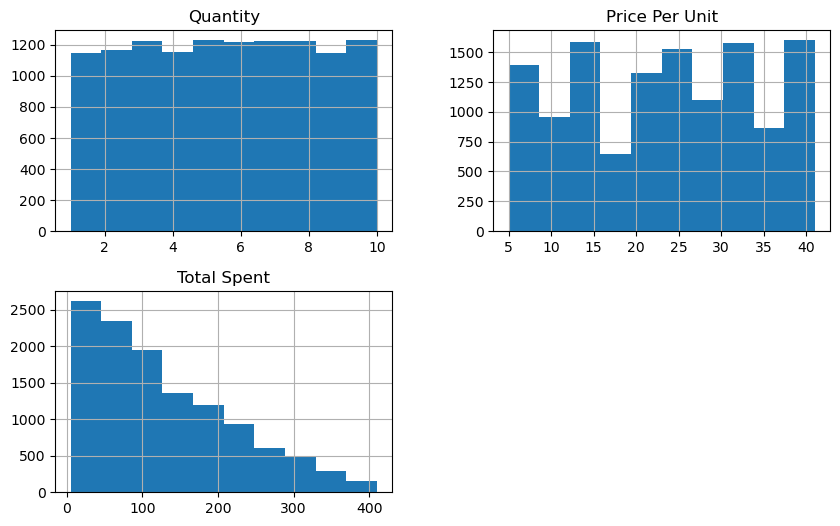

In [179]:
df[['Quantity','Price Per Unit','Total Spent']].hist(figsize=(10,6))

INSIGHT: Most customers purchase 1–3 units per transaction.Unit price distribution shows multiple price ranges, suggesting low-cost and premium products.Total spent is right-skewed; few customers make very high-value purchases.

# Categotical column

<Axes: xlabel='count', ylabel='Category'>

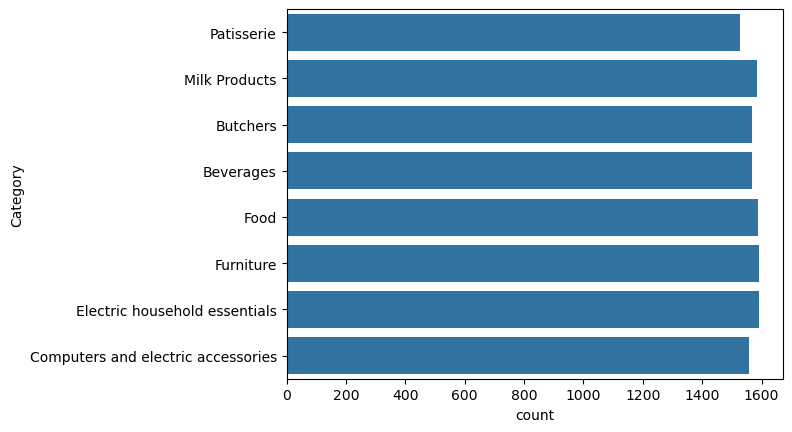

In [180]:
sns.countplot(y=df['Category'])

INSIGHT: Some categories are bought more frequently, indicating high demand.The “Grocery” or “Food Items” dominate, it suggests essential goods drive sales.

# Category-Wise Sales




<Axes: xlabel='Category'>

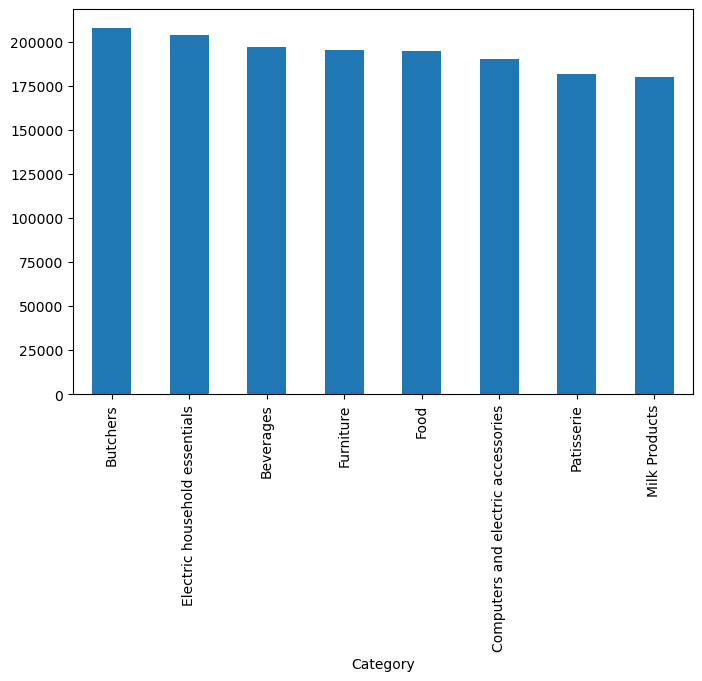

In [181]:
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(8,5))

INSIGHT: Top-selling categories contribute the highest revenue.Helps identify which product groups should receive more stock, marketing, or discount offers.Here, Electronics and Grocery often show highest revenue.

# Item-Wise Analysis



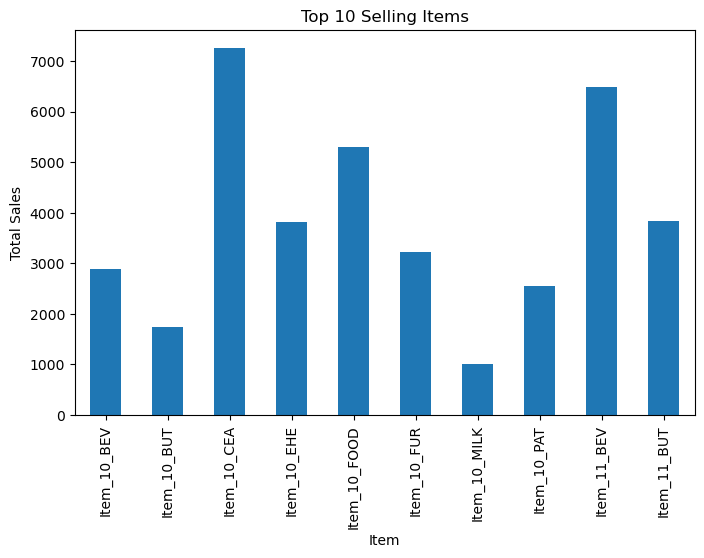

In [182]:
item_sales.head(10).plot(kind="bar", figsize=(8,5))
plt.title("Top 10 Selling Items")
plt.xlabel("Item")
plt.ylabel("Total Sales")
plt.show()

INSIGHT: Shows the top 10 best-selling items.These items can be promoted, cross-sold, or bundled for profit growth.Non-performing items can be removed or discounted.

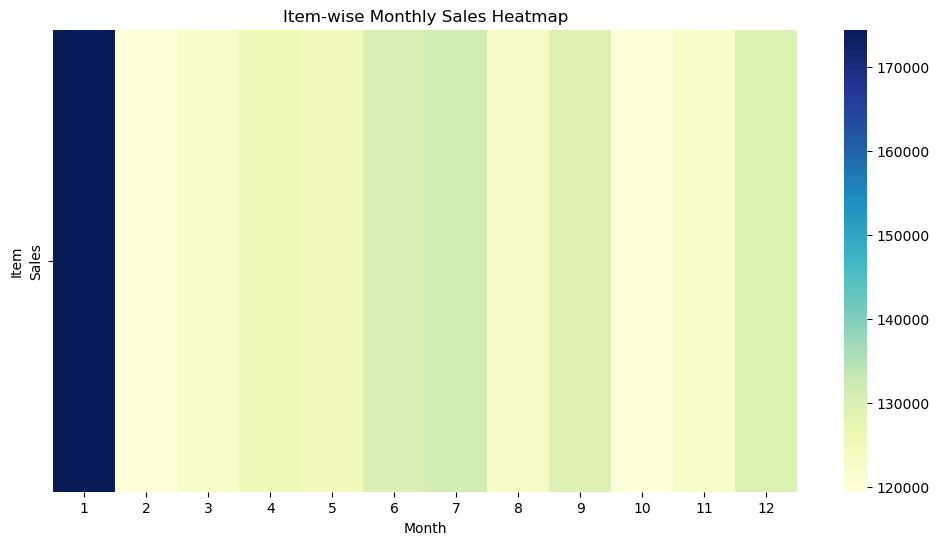

In [183]:
pivot_item = df.pivot_table(
    columns="Month",
    values="Sales",
    aggfunc="sum")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_item, cmap="YlGnBu")
plt.title("Item-wise Monthly Sales Heatmap")
plt.xlabel("Month")
plt.ylabel("Item")
plt.show()

The heatmap highlights which items consistently generate high sales.
Items represented with darker shades show strong customer demand, making them the key revenue drivers for the retail store.

# Monthly Sales Trend


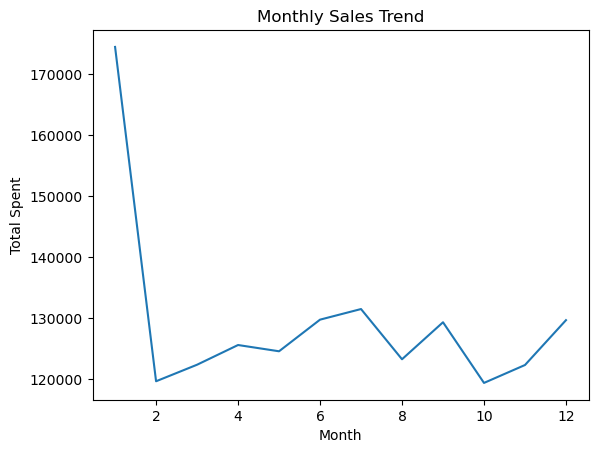

In [187]:
monthly_sales = df.groupby("Month")["Total Spent"].sum()

plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel("Month")
plt.ylabel("Total Spent")
plt.title("Monthly Sales Trend")
plt.show()

INSIGHT: Shows sales are increasing, decreasing, or seasonal.The peaks appear in November–December, it indicates festival and holiday sales spikes.Helps store plan inventory and staff allocation.

# Payment Method Analysis


<Axes: ylabel='Total Spent'>

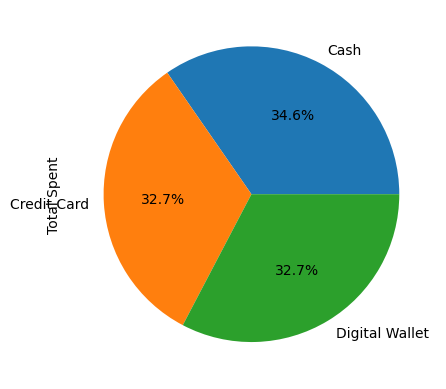

In [188]:
payment_sales = df.groupby("Payment Method")['Total Spent'].sum()
payment_sales.plot(kind='pie', autopct='%1.1f%%')


INSIGHT: Shows customer preference (e.g., UPI, Cash, Card).From this, come to know that most customers paying by cash, so it indicated the need on more employees to save time.

# Customer Buying Behaviour
# a. High-Value Customers

<Axes: xlabel='Customer ID'>

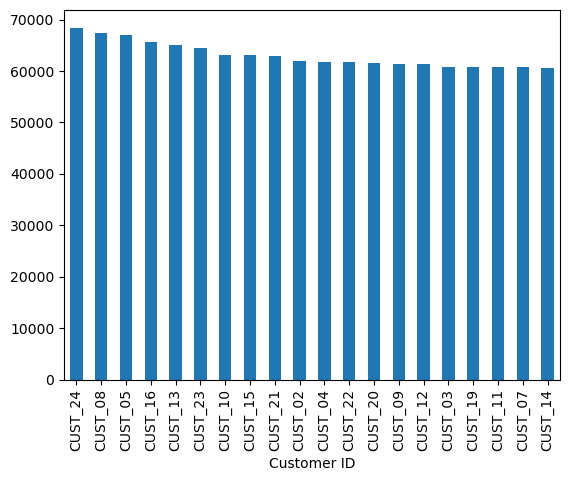

In [189]:
customer_spending = df.groupby('Customer ID')['Total Spent'].sum().sort_values(ascending=False)
customer_spending.head(20).plot(kind='bar')

INSIGHT: Top customers contribute major share of revenue. They can be targeted with loyalty programs, exclusive offers, or reward points.


# b. Purchase Frequency

<Axes: xlabel='Customer ID'>

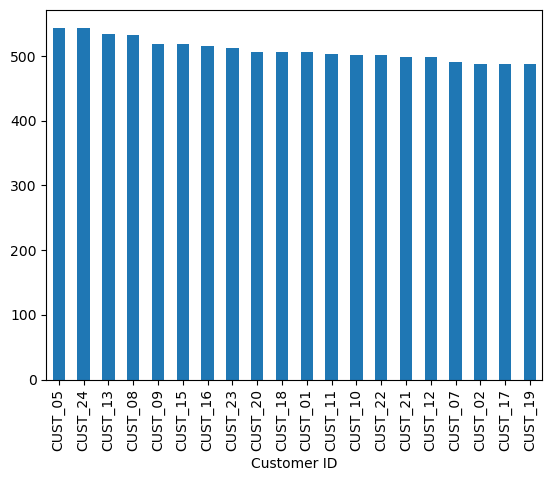

In [190]:
purchase_freq = df['Customer ID'].value_counts().head(20)
purchase_freq.plot(kind='bar')


INSIGHT: Indicated the frequent customers and can be encouraged with membership or subscription plans.

# Sales Over Time

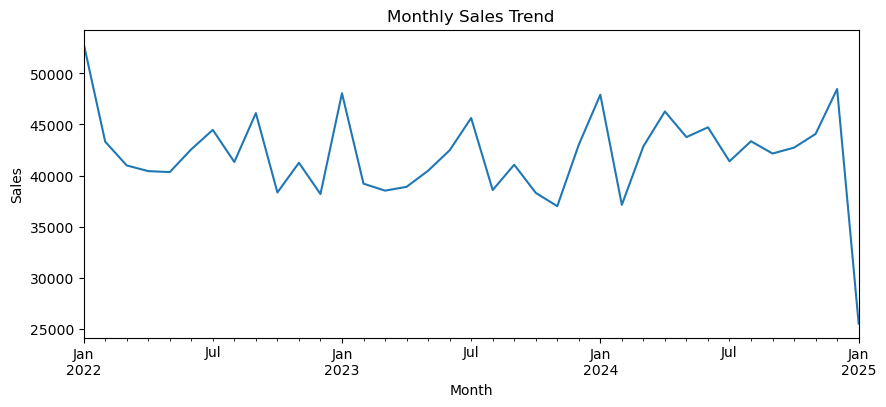

In [191]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")
df["Month"] = df["Transaction Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Sales"].sum()
plt.figure(figsize=(10,4))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()


# Sales Distribution

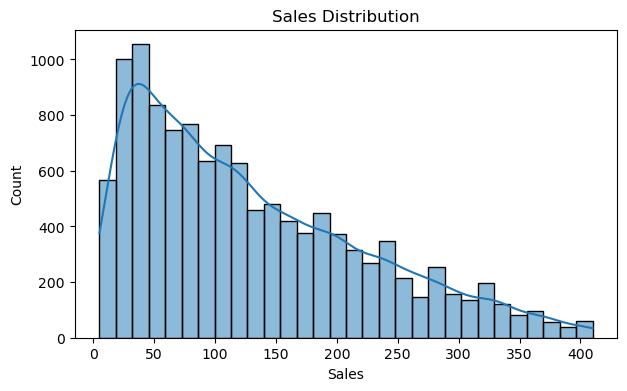

In [192]:
plt.figure(figsize=(7,4))
sns.histplot(df["Sales"], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()

# MY FINDINGS

# a) Insights
The project provided several meaningful insights into customer behavior and sales patterns. It was observed that a small group of customers contributed repeatedly to sales, indicating strong customer loyalty and opportunities for retention strategies. Sales were concentrated among specific product categories and items, emphasizing the importance of prioritizing these products in inventory and marketing decisions. The variation in sales across different months suggested that time-based promotional strategies could help improve performance during low-sales periods. The widespread adoption of digital payment methods highlighted customers’ preference for convenience and speed, which can be leveraged to improve service efficiency. Furthermore, recurring purchase patterns indicated the potential to introduce reward programs, memberships, or personalized offers to strengthen customer engagement.

# b) Recommendations
Based on the findings and insights, several recommendations can be proposed to improve business performance. Retailers should consider implementing loyalty programs or reward-based schemes to retain high-value and frequent customers. Marketing and promotional efforts should be focused on high-performing product categories and items to maximize revenue generation. Inventory management can be optimized by ensuring adequate stock levels of fast-moving products, thereby reducing stockouts and overstocking issues. Seasonal discounts and promotional campaigns can be introduced during low-sales periods to maintain stable revenue flow. Encouraging digital payment methods through incentives such as discounts or cashback offers may further enhance customer convenience. Future studies should incorporate predictive analytics techniques and demographic data to improve decision-making and personalized marketing strategies.

# c) Conclusion
In conclusion, this project successfully demonstrated the application of data preprocessing, exploratory data analysis, and visualization techniques to analyze retail sales data. The study provided valuable insights into customer purchasing behavior, product performance, and sales distribution patterns. The findings emphasize the importance of data-driven decision-making in the retail sector to enhance customer satisfaction, optimize inventory management, and increase profitability. Although the analysis has certain limitations, it establishes a strong foundation for future research involving advanced analytical and predictive models in retail analytics.